In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Tax.csv')
df

,user_country,source,content,date
0,"IL, District 16",Twitter for iPhone,"@scottstev @awprokop Right. Also, we didn't se...",2020-10-22T23:59:57+00:00
1,United States,Twitter for Android,@revision29 @SWNID Except Joe's taxes show he ...,2020-10-22T23:59:57+00:00
2,NaN,Twitter Web App,@AugustCohen4 @AndrewCMcCarthy @DonaldJTrumpJr...,2020-10-22T23:59:57+00:00
3,"Chesapeake, VA",Twitter for iPhone,Why do the BAFOONS on the left keep saying Bid...,2020-10-22T23:59:56+00:00
4,"IMPEACHED, FOREVER",Twitter for Android,@sjsturkie @NicholasNieblas @FlyStatement @Jam...,2020-10-22T23:59:56+00:00
...,...,...,...,...
1995,"Houston, TX",Twitter for Android,"@Michael58021312 Trump is just been himself, B...",2020-10-22T23:39:11+00:00
1996,NaN,Twitter for iPhone,"@seanhannity Do the US tax payers ,Black,White...",2020-10-22T23:39:10+00:00
1997,In the clouds ☁️,Twitter for iPhone,@tobbieefash @TheLazyCheff @Pweedyfisayo Why c...,2020-10-22T23:39:09+00:00
1998,Southeast PA,Twitter for iPhone,@iheartmindy 20 years of Biden’s tax returns a...,2020-10-22T23:39:07+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

71569
['@scottstev', '@awprokop', 'right', '.', 'also', ',', 'we', "didn't", 'see', 'anything', 'unusual', 'in', 'more', 'than', 'a', 'decade', 'of', "joe's", 'tax', 'returns']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 193.45%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

30536
['right', 'also', 'see', 'anything', 'unusual', 'decade', "joe's", 'tax', 'returns', 'dozens', 'launder', 'money', 'like', 'trump', 'lol', 'except', "joe's", 'taxes', 'show', 'involved']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 145),
 ('@joebiden', 120),
 ('@donaldjtrumpjr', 59),
 ('@andrewcmccarthy', 58),
 ('@gop', 34),
 ('@foxnews', 26),
 ('@bretbaier', 21),
 ('@johnrobertsfox', 19),
 ('@petebuttigieg', 18),
 ('@teamtrump', 13),
 ('@richardgrenell', 12),
 ('@prageru', 12),
 ('@nypost', 11),
 ('@sectest9', 10),
 ('@seanhannity', 10),
 ('@mzhemingway', 10),
 ('@charliekirk11', 9),
 ('@50cent', 9),
 ('@thebradfordfile', 9),
 ('@npr', 9)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"IL, District 16",Twitter for iPhone,"@scottstev @awprokop Right. Also, we didn't se...",2020-10-22T23:59:57+00:00,Positive
1,United States,Twitter for Android,@revision29 @SWNID Except Joe's taxes show he ...,2020-10-22T23:59:57+00:00,Negative
2,NaN,Twitter Web App,@AugustCohen4 @AndrewCMcCarthy @DonaldJTrumpJr...,2020-10-22T23:59:57+00:00,Positive
3,"Chesapeake, VA",Twitter for iPhone,Why do the BAFOONS on the left keep saying Bid...,2020-10-22T23:59:56+00:00,Negative
4,"IMPEACHED, FOREVER",Twitter for Android,@sjsturkie @NicholasNieblas @FlyStatement @Jam...,2020-10-22T23:59:56+00:00,Negative
...,...,...,...,...,...
1995,"Houston, TX",Twitter for Android,"@Michael58021312 Trump is just been himself, B...",2020-10-22T23:39:11+00:00,Neutral
1996,NaN,Twitter for iPhone,"@seanhannity Do the US tax payers ,Black,White...",2020-10-22T23:39:10+00:00,Positive
1997,In the clouds ☁️,Twitter for iPhone,@tobbieefash @TheLazyCheff @Pweedyfisayo Why c...,2020-10-22T23:39:09+00:00,Neutral
1998,Southeast PA,Twitter for iPhone,@iheartmindy 20 years of Biden’s tax returns a...,2020-10-22T23:39:07+00:00,Negative


In [11]:
df.sentiment.value_counts()

Positive    941
Negative    579
Neutral     480
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 47.05%
Percentage of neutral tweets: 24.00%
Percentage of negative tweets: 28.95%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

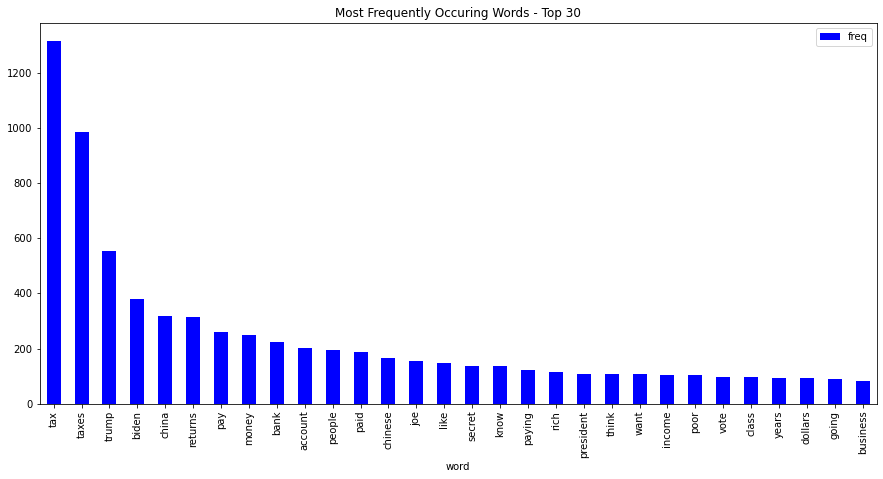

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

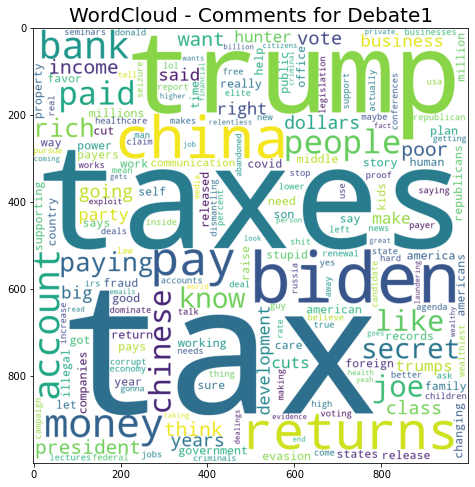

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

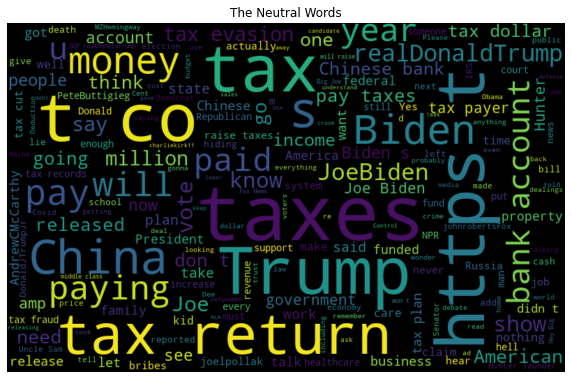

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

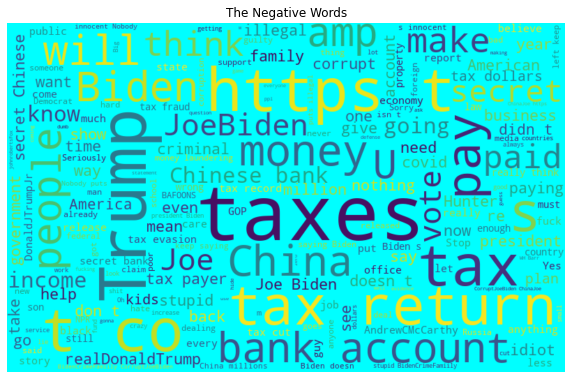

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

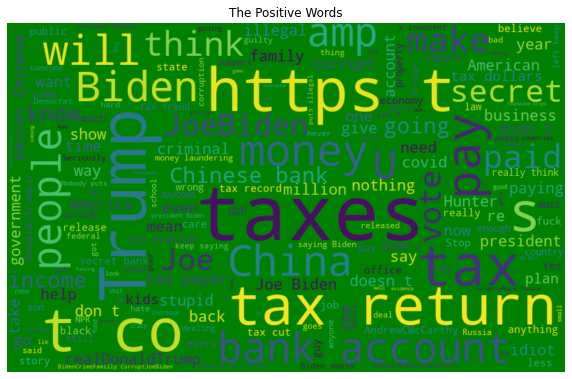

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,"@scottstev @awprokop Right. Also, we didn't se...",Positive
1,@revision29 @SWNID Except Joe's taxes show he ...,Negative
2,@AugustCohen4 @AndrewCMcCarthy @DonaldJTrumpJr...,Positive
3,Why do the BAFOONS on the left keep saying Bid...,Negative
4,@sjsturkie @NicholasNieblas @FlyStatement @Jam...,Negative
...,...,...
1995,"@Michael58021312 Trump is just been himself, B...",Neutral
1996,"@seanhannity Do the US tax payers ,Black,White...",Positive
1997,@tobbieefash @TheLazyCheff @Pweedyfisayo Why c...,Neutral
1998,@iheartmindy 20 years of Biden’s tax returns a...,Negative


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,right also we didn t see anything unusual in m...
1,Negative,except joe s taxes show he hasn t been involve...
2,Positive,i mean there are many ways people shield money...
3,Negative,why do the bafoons on the left keep saying bid...
4,Negative,i wonder what modern day trump supporters woul...
...,...,...
1995,Neutral,trump is just been himself biden is a total pr...
1996,Positive,do the us tax payers black white or yellow eve...
1997,Neutral,why can t taxes pay for that
1998,Negative,years of biden s tax returns available for rev...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,right also we didn t see anything unusual in m...
2,Positive,i mean there are many ways people shield money...
6,Positive,so looking at the many options at food deliver...
8,Positive,i know right million americans voted already t...
9,Positive,changing legislation in favor of the poor dism...
...,...,...
1984,Negative,no wall no mexico didn t pay no healthcare pla...
1986,Negative,i understand that if it were up to me they wou...
1990,Negative,it was roughly with tax and an additional for ...
1993,Negative,no nobody cares about biden s or trump taxes d...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,right also we didn t see anything unusual in m...
2,1,i mean there are many ways people shield money...
6,1,so looking at the many options at food deliver...
8,1,i know right million americans voted already t...
9,1,changing legislation in favor of the poor dism...
...,...,...
1984,0,no wall no mexico didn t pay no healthcare pla...
1986,0,i understand that if it were up to me they wou...
1990,0,it was roughly with tax and an additional for ...
1993,0,no nobody cares about biden s or trump taxes d...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(1140, 2)
(380, 2)


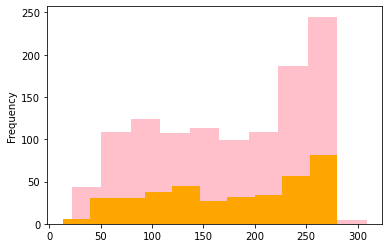

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(506707, 752140)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('donald', 0.7609521150588989),
 ('saudi', 0.7055532932281494),
 ('nyt', 0.695412278175354),
 ('vice', 0.6880980730056763),
 ('arabia', 0.6764259338378906),
 ('compared', 0.6685515642166138),
 ('actual', 0.6658246517181396),
 ('promised', 0.6631371974945068),
 ('org', 0.6630687117576599),
 ('ran', 0.6628919839859009)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('from', -0.24465599656105042),
 ('of', -0.2640590965747833),
 ('our', -0.27667298913002014),
 ('x', -0.28127700090408325),
 ('guilty', -0.28246957063674927),
 ('goes', -0.2907920479774475),
 ('covid', -0.29162222146987915),
 ('paye', -0.2923334836959839),
 ('ttc', -0.3047839403152466),
 ('at', -0.3056947886943817)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(1140, 500)
(1140,)
(380, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5
F1 score : 0.5128205128205128
[[ 90  67]
 [123 100]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9947368421052631
Validation Accuracy : 0.5763157894736842
f1 score : 0.6610526315789473
[[ 62  95]
 [ 66 157]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4763157894736842
f1 score : 0.4547945205479452
[[ 98  59]
 [140  83]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9491228070175438
Validation Accuracy : 0.5973684210526315
f1 score : 0.7320490367775833
[[ 18 139]
 [ 14 209]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 joe caught lying again it was all illegal joe used your tax dollars for foreign influence millions of voters shocked millions are not several felonies involved tony bobulinski held presser claiming joe biden knew about hunter s busi 

First sample after preprocessing: 
 [ 68 286  15  51  41 222  68  31   4 110  14 165 491 152   6 152  22  23
 492  68  21  35 143   9   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
9/9 - 2s - loss: 0.6720 - accuracy: 0.6218 - val_loss: 0.6677 - val_accuracy: 0.6053
Epoch 2/20
9/9 - 1s - loss: 0.6571 - accuracy: 0.6326 - val_loss: 0.6682 - val_accuracy: 0.6053
Epoch 3/20
9/9 - 1s - loss: 0.6577 - accuracy: 0.6326 - val_loss: 0.6677 - val_accuracy: 0.6053
Epoch 4/20
9/9 - 1s - loss: 0.6524 - accuracy: 0.6326 - val_loss: 0.6603 - val_accuracy: 0.6053
Epoch 5/20
9/9 - 1s - loss: 0.6399 - accuracy: 0.6326 - val_loss: 0.6532 - val_accuracy: 0.6053
Epoch 6/20
9/9 - 1s - loss: 0.6305 - accuracy: 0.6326 - val_loss: 0.6461 - val_accuracy: 0.6053
Epoch 7/20
9/9 - 1s - loss: 0.6195 - accuracy: 0.6326 - val_loss: 0.6373 - val_accuracy: 0.6053
Epoch 8/20
9/9 - 1s - loss: 0.6012 - accuracy: 0.6326 - val_loss: 0.6197 - val_accuracy: 0.6053
Epoch 9/20
9/9 - 2s - loss: 0.5846 - accuracy: 0.6326 - val_loss: 0.5962 - val_accuracy: 0.6053
Epoch 10/20
9/9 - 1s - loss: 0.5567 - accuracy: 0.6394 - val_loss: 0.5734 - val_accuracy: 0.6579
Epoch 11/20
9/9 - 1s - loss: 0.5252 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,right also we didn t see anything unusual in m...
1,0,except joe s taxes show he hasn t been involve...
2,1,i mean there are many ways people shield money...
3,0,why do the bafoons on the left keep saying bid...
4,0,i wonder what modern day trump supporters woul...
...,...,...
1995,-1,trump is just been himself biden is a total pr...
1996,1,do the us tax payers black white or yellow eve...
1997,-1,why can t taxes pay for that
1998,0,years of biden s tax returns available for rev...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.416
F1 score : [0.4797048  0.39344262 0.39118457]
[[ 65  39  18]
 [ 32  72  43]
 [ 52 108  71]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9106666666666666
Validation Accuracy : 0.43
f1 score : [0.42508711 0.39102564 0.4638404 ]
[[61 30 31]
 [40 61 46]
 [64 74 93]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.41
f1 score : [0.37860082 0.43961353 0.39650146]
[[ 46  58  18]
 [ 30  91  26]
 [ 45 118  68]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8626666666666667
Validation Accuracy : 0.466
f1 score : [0.54711246 0.30894309 0.49411765]
[[ 90   9  23]
 [ 43  38  66]
 [ 74  52 105]]


In [59]:
X_Train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['discussion of payment in lieu of taxes for large non profits re tufts and partners in health i believe matt mclaughlin talking about the juxtaposition of power that these oft billion institutions get to choose what they feel like contributing to the community', 'he s going with i didn t put it in my taxes so it isn t true come on man crookedjoe bidencrimefamiily bidenlaptop tonybobulinski', 'even though our tax are going on tight time and to right jurisdiction but government is not ready to support or help the people needs very pathetic and disgusting', 'where is the media yes andy but even more importantly where are the federal agencies our tax dollars pay to stop criminal organizations like the bidens bidencrimefamily', 'endstatesrightstreason fed funds justifies audit by usgovt state local govts tax ppl to pay their salaries fund corrupt projects but no money for citizens basic needs time to rationalize govt fed pays humans services same laws s

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.5983 - accuracy: 0.2911 - val_loss: 0.5385 - val_accuracy: 0.2867
Epoch 2/20
11/11 - 2s - loss: 0.5521 - accuracy: 0.2881 - val_loss: 0.5430 - val_accuracy: 0.2867
Epoch 3/20
11/11 - 2s - loss: 0.5466 - accuracy: 0.2881 - val_loss: 0.5215 - val_accuracy: 0.2867
Epoch 4/20
11/11 - 2s - loss: 0.5133 - accuracy: 0.2881 - val_loss: 0.4619 - val_accuracy: 0.2867
Epoch 5/20
11/11 - 2s - loss: 0.4437 - accuracy: 0.2881 - val_loss: 0.3542 - val_accuracy: 0.2867
Epoch 6/20
11/11 - 2s - loss: 0.2599 - accuracy: 0.3081 - val_loss: 0.1107 - val_accuracy: 0.3867
Epoch 7/20
11/11 - 2s - loss: -1.2789e-01 - accuracy: 0.3978 - val_loss: -3.1575e-01 - val_accuracy: 0.4800
Epoch 8/20
11/11 - 2s - loss: -9.2771e-01 - accuracy: 0.4756 - val_loss: -1.2881e+00 - val_accuracy: 0.5000
Epoch 9/20
11/11 - 2s - loss: -2.6892e+00 - accuracy: 0.5015 - val_loss: -3.1342e+00 - val_accuracy: 0.5133
Epoch 10/20
11/11 - 2s - loss: -5.9536e+00 - accuracy: 0.4911 - val_loss: -5.8194e+00 - 